# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [1]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


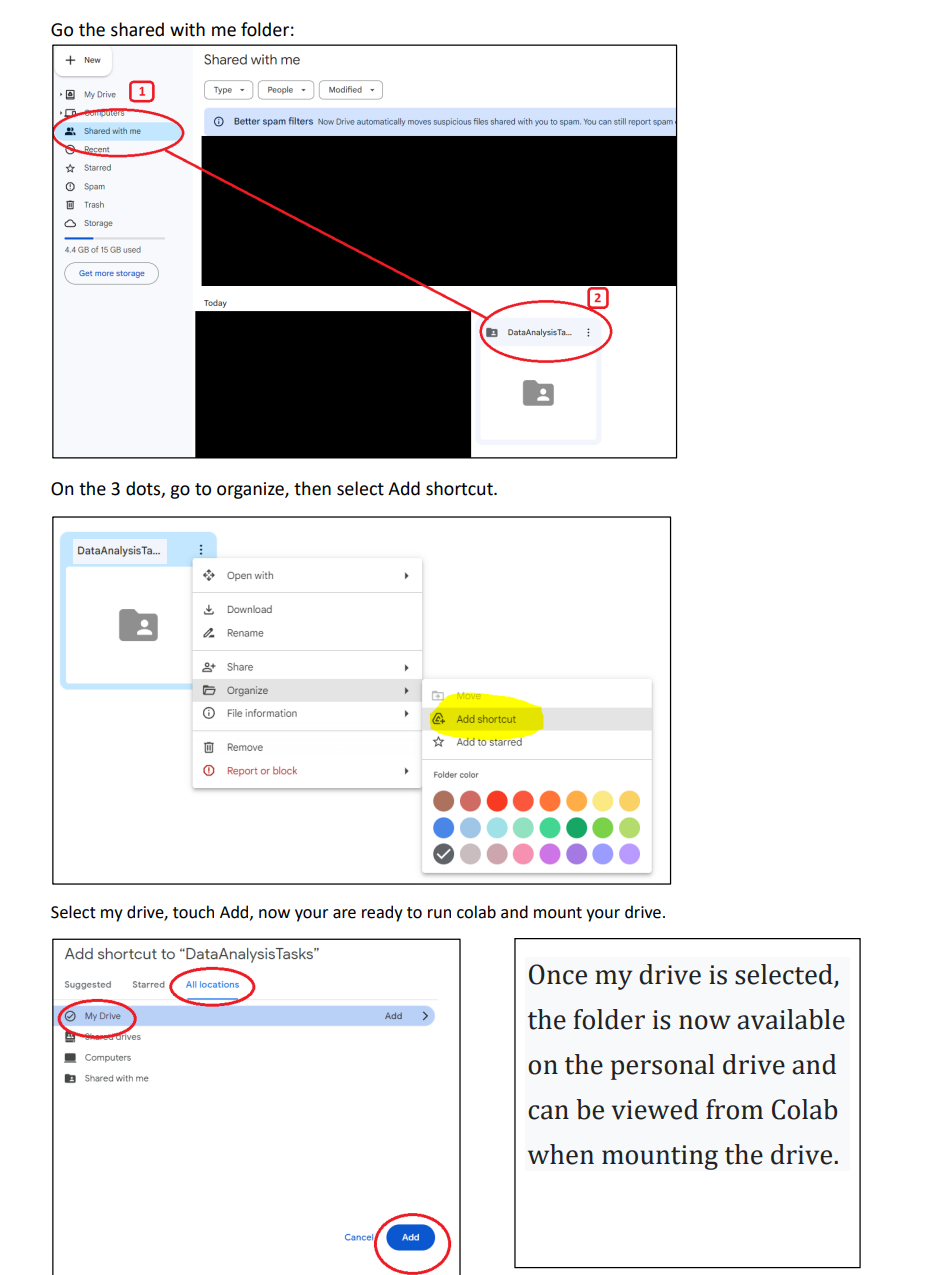

In [2]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [8]:
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.layouts import column
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Slider, CustomJS, HoverTool

try:
    # Read the workout data from the CSV file
    data = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/CO2 Emissions.csv", encoding='ISO-8859-1')

    data.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")

data['Vehicle Class'] = data['Vehicle Class'].astype('category')

# Create a Bokeh figure
p = figure(width=800, height=400, title="City vs Highway Fuel Consumption", x_axis_label="City Fuel Consumption (L/100 km)", y_axis_label="Highway Fuel Consumption (L/100 km)")

# Create a source for all data
source = ColumnDataSource(data=data)

# Create a source for filtered data (initially the same as all data)
filtered_source = ColumnDataSource(data=data)

# Scatter plot
p.scatter(x="Fuel Consumption City (L/100 km)", y="Fuel Consumption Hwy (L/100 km)", source=filtered_source, alpha=0.6)

# Hover tool
hover = HoverTool()
hover.tooltips = [("Make", "@Make"), ("Model", "@Model"), ("Vehicle Class", "@{Vehicle Class}"), ("Cylinders", "@Cylinders")]
p.add_tools(hover)

# Sliders
cylinders_slider = Slider(start=data['Cylinders'].min(), end=data['Cylinders'].max(), step=1, value=data['Cylinders'].min(), title="Number of Cylinders")
engine_size_slider = Slider(start=data['Engine Size(L)'].min(), end=data['Engine Size(L)'].max(), step=0.1, value=data['Engine Size(L)'].max(), title="Engine Size (L)")

# JavaScript callback to filter data based on sliders
callback = CustomJS(args=dict(source=source, filtered_source=filtered_source, cylinders_slider=cylinders_slider, engine_size_slider=engine_size_slider), code="""
    const data = source.data;
    const filtered_data = filtered_source.data;
    const cylinders = cylinders_slider.value;
    const engine_size = engine_size_slider.value;

    for (const key in filtered_data) {
        filtered_data[key] = [];
    }

    for (let i = 0; i < data['Cylinders'].length; i++) {
        if (data['Cylinders'][i] == cylinders && data['Engine Size(L)'][i] <= engine_size) {
            for (const key in filtered_data) {
                filtered_data[key].push(data[key][i]);
            }
        }
    }

    filtered_source.change.emit();
""")

# Attach the callback to the sliders
cylinders_slider.js_on_change('value', callback)
engine_size_slider.js_on_change('value', callback)

# Layout widgets and plot
layout = column(p, cylinders_slider, engine_size_slider)

# Show plot
output_notebook()
show(layout)



CSV file loaded successfully, you can start working right now
